In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 지도학습

### 분류와 회귀

### 일반화, 과대적합, 과소적합

#### 모델 복잡도와 데이터셋 사이즈의 관계

## 지도학습 알고리즘

## Forge 데이터셋

### 2개의 특성을 가진 이진 분류 데이터셋

## 1. 데이터셋 적재 및 확인하기

X.shape: (26, 2)


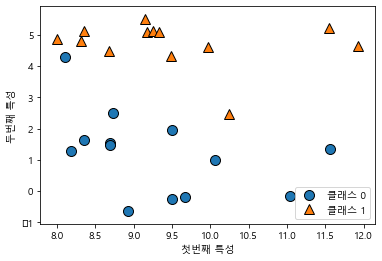

In [16]:
import matplotlib.pyplot as plt
import mglearn
#데이터셋 만들기
X, y = mglearn.datasets.make_forge()
#산점도를 그린다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")
print("X.shape:", X.shape)
plt.show()

### K-최근접 이웃 회귀 (k_Neighbors Regression)
* 가장 가까운 최근접 이웃의 평균을 예측값으로 취함
* Wave 데이터셋 분류

Text(0, 0.5, '타깃')

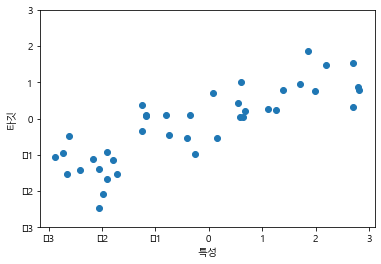

In [18]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

## 위스콘신 유방암 데이터셋

### 유방암 종양의 임상 데이터를 기록

#### 각 종양은 양성(benign)과 악성(malignant)으로 레이블되어 있으며, 종양이 악성인지를 예측

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [23]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [24]:
print("유방암 데이터의 형태:", cancer.data.shape)

유방암 데이터의 형태: (569, 30)


In [28]:
import numpy as np
print("클래스별 샘플 갯수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [33]:
print("특성이름:\n", cancer.feature_names)

특성이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [38]:
import pandas as pd
cancer_data = cancer.data
cancer_df = pd.DataFrame(data=cancer_data,
                        columns=cancer.feature_names)
cancer_df['label'] = cancer.target
cancer_df.tail(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


## 보스턴 주택가격

In [40]:
import warnings
warnings.filterwarnings(action = 'ignore', category=FutureWarning)

from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [46]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [48]:
import pandas as pd
boston_df = pd.DataFrame(data=boston.data,
                        columns=boston.feature_names)
boston_df['label'] = boston.target
boston_df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [41]:
X, y = mglearn.datasets.load_extended_boston() #데이터 확장(13개->104개)
print("X.shape:", X.shape)

X.shape: (506, 104)


## 2. K-최근접(knn) 이웃 알고리즘 적용하기(p.63)

### k-최근접 이웃분류

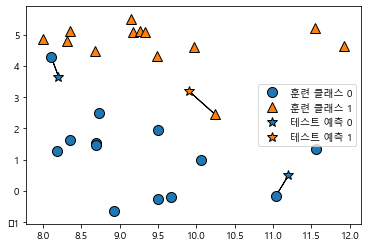

In [52]:
# 이웃의 수를 1로 설정 (별은 새로운 데이터 포인트, 방경에 가까운 색깔)
mglearn.plots.plot_knn_classification(n_neighbors=1)

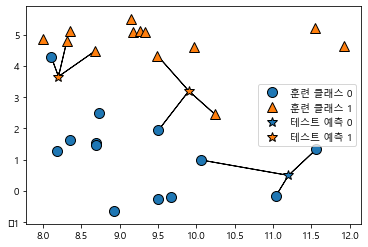

In [53]:
# 이웃의 수를 3으로 설정 (새로운 데이터 포인트의 방경에 3개 봄)
mglearn.plots.plot_knn_classification(n_neighbors=3) 

In [60]:
# 데이터를 훈련 세트의 테스트 세트로 나눔(훈련 테스트 검증으로 나중에 나눔)
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [61]:
#KNeighborsClassifier 객체생성
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [62]:
# 훈련세트를 사용한 분류 모델 학습(훈련값)75%
clf.fit(X_train, y_train) #fit이 학습시킴 (입력값, 정답)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# 테스트 테스터 예측 - predict 메서드 호출(테스트값)25%
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [64]:
#테스트 세트 정확도 - 얼마나 잘 일반화 되었는지 score 메서드 호출
print("테스트 세트 정확도{: .2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 0.86


In [67]:
y_pred = clf.predict(X_test)

In [68]:
import pandas as pd
comparison = pd.DataFrame({'예측값':y_pred, '실제값':y_test})
comparison

,예측값,실제값
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,1
6,0,0


## KNN 최근접 이웃 알고리즘 분석

* 이웃의 갯수(1,3,9개일때의)에 따른 모델의 결정 경계선을 그래프로 그려서 확인

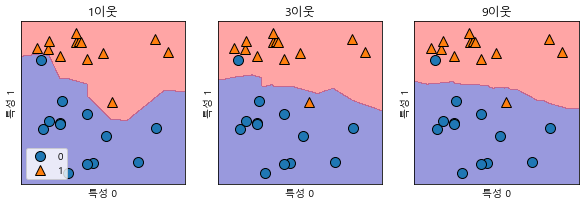

In [73]:
#subplot 1줄에 3개짜리 생성
fig, axes = plt.subplots(1,3, figsize=(10, 3))

# 이웃의 갯수에 따른 최근접 이웃 모델의 경계
#1개/3개/9개의 이웃일때 경계를 표시한다
for n_neighbors, ax in zip([1,3,9], axes):
    #fit 메소드는 self오브젝트를 리턴합니다.
    #객체 생성과 fit 메소드를 한줄에 쓸수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
plt.show()

### KNeighborsClassifier 분석

#### 그래프 출력결과
* 이웃의 수를 늘릴수록 결정경계는 부드러워짐, 복잡도 낮아짐
* 즉, 이웃을 적게 사용하면 모델의 복잡도가 높아짐

## 유방암 데이터 세트 성능 평가

### 모델의 복잡도와 일반화 사이의 관계

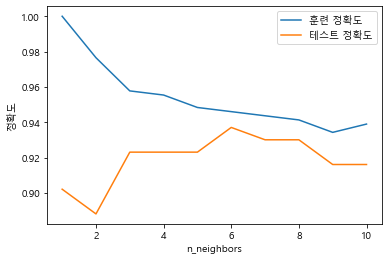

In [84]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

#훈련 세트와 테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
#stratify 데이터 비율 유지 75:25그대로 유지해주세요

training_accuracy = []
test_accuracy = []
#1에서 10까지 n_neighbors(이웃의 개수)를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    
    #모델 생성 : fit 메서드는 self 객체를 반환,
    #객체 생서과 fit 메서드를 한줄에 쓸수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #훈련세트정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show() # 이 그림상으로는 이웃을 6개 했을때가 제일 좋다

## KNeighborsClassifier분석

### 유방암 데이터세트 성능 평가 결과

### 모델의 복잡도와 일반화 사이의 관계
* 이웃 수가 적으면 모델은 복잡해 지고 훈련 정확도는 큼(과대적합)
* 이웃 수가 커지면 모델은 단순해지고 훈련 정화도는 줄어듦(과소적합)
* 반대로 테스트 정확도는 높아지지만 이웃의 수가 클때는 모델이 단순해지므로 정확도가 나빠짐

### k_Neighbors Regressing(K-최근접 이웃 회귀)
* Wave 데이터셋

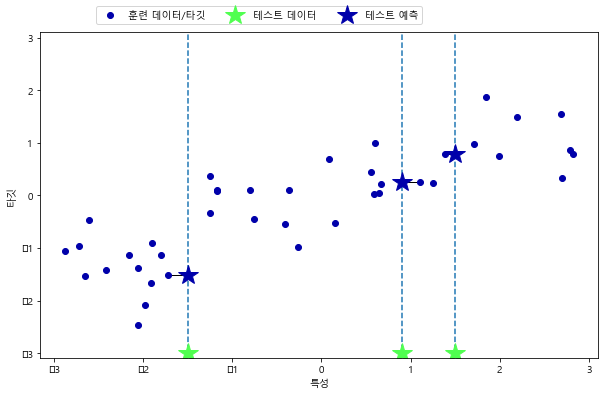

In [91]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

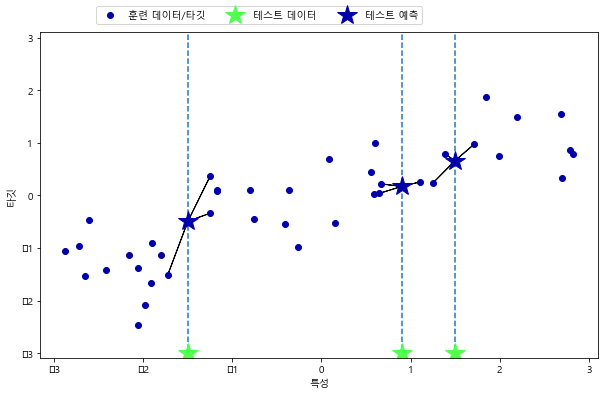

In [92]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [103]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터 셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
#reg = KNeighborsRegressor(n_neighbors=3, p=1 매트릭스 설정p=1)
#이웃의 수를 3으로 하여 모델의 객체를 만듭니다.
reg.fit(X_train, y_train) #훈련데이터와 타깃을 사용하여 모델을 학습시킵니다.

KNeighborsRegressor(n_neighbors=3)

In [95]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [97]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석

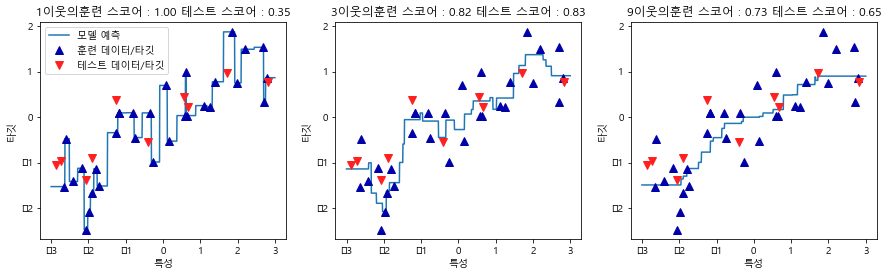

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
#-3과 3 사이에 1,000 개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    #1,3,9이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{}이웃의훈련 스코어 : {:.2f} 테스트 스코어 : {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()

### Wave 데이터세트 성능 평가 결과
* 이웃을 적게 사요하면 매우 불안정한 예측
* 이웃을 많이 사용하면 훈련 데이터에는 잘 안맞지만 안정된 예측
* 분류기법 : https://jeongmin-lee.tistory.com/86
